# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [21]:
sinasc_a = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome']]
sinasc_b = sinasc_a.drop(sinasc_a[sinasc_a['munResNome']=='Município ignorado - RO'].index)

In [22]:
sinasc_b.groupby('munResNome').mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [23]:
sinasc_c = sinasc_raw[['ESCMAE', 'PESO', 'SEXO', 'DTNASC']]

In [25]:
# Filtrando pelo dia 03/Junho

sinasc_c[sinasc_c['DTNASC'] == '2019-06-03'].groupby(['ESCMAE', 'SEXO'])['PESO'].mean()

ESCMAE           SEXO     
1 a 3 anos       Masculino    3750.000000
12 anos ou mais  Feminino     2957.500000
                 Masculino    3366.785714
4 a 7 anos       Feminino     3081.666667
                 Masculino    3094.000000
8 a 11 anos      Feminino     3204.391304
                 Masculino    3209.652174
Name: PESO, dtype: float64

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [26]:
sinasc_d = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome', ]]
sinasc_e = sinasc_d.drop(sinasc_d[sinasc_d['munResNome']=='Município ignorado - RO'].index)

In [27]:
# Município com menos nascimentos

sinasc_e.munResNome.value_counts().sort_values(ascending = True)[:1]

Castanheiras    32
Name: munResNome, dtype: int64

In [30]:
sinasc_e[sinasc_e['munResNome'] == 'Castanheiras'].groupby('munResNome').agg([('Média', 'mean'), ('Máxima', 'max'), ('Mínima', 'min')])

IDADEMAE                 IDADEPAI              
                 Média Máxima Mínima      Média Máxima Mínima
munResNome                                                   
Castanheiras  27.28125     39     17  30.392857   43.0   17.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [31]:
sinasc_f = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome', 'DTNASC', 'QTDFILVIVO']]
sinasc_g = sinasc_f.drop(sinasc_f[sinasc_f['munResNome']=='Município ignorado - RO'].index)

In [33]:
sinasc_g.loc[:,'DTNASC'] = pd.to_datetime(sinasc_g['DTNASC'])

In [34]:
sinasc_g.set_index('DTNASC', inplace=True)

In [35]:
sinasc_g['MES'] = sinasc_g.index.month

In [36]:
sinasc_g.head()

,IDADEMAE,IDADEPAI,munResNome,QTDFILVIVO,MES
DTNASC,,,,,
2019-02-19,19,26.0,Alta Floresta D'Oeste,0.0,2
2019-02-21,29,24.0,Alta Floresta D'Oeste,1.0,2
2019-02-25,37,32.0,Alta Floresta D'Oeste,2.0,2
2019-03-20,30,24.0,Alto Alegre dos Parecis,0.0,3
2019-03-23,30,27.0,Alta Floresta D'Oeste,1.0,3


In [58]:
# Município que nasceu mais bebe no mês de março

sinasc_g[sinasc_g['MES'] == 3].groupby(['munResNome'])['munResNome'].count().sort_values(ascending = False)[:1]

munResNome
Porto Velho    744
Name: munResNome, dtype: int64

In [41]:
sinasc_g[sinasc_g['munResNome'] == 'Porto Velho'].groupby('munResNome').agg({'QTDFILVIVO': [('Média', 'mean'), ('Máxima', 'max'), ('Mínima', 'min')]})

QTDFILVIVO              
                 Média Máxima Mínima
munResNome                          
Porto Velho   1.167236   12.0    0.0

In [42]:
sinasc_g[sinasc_g['munResNome'] == 'Porto Velho'].groupby('munResNome').agg({'IDADEMAE': [('Média', 'mean'), ('Máxima', 'max'), ('Mínima', 'min')], 'IDADEPAI': [('Média', 'mean'), ('Máxima', 'max'), ('Mínima', 'min')]})

IDADEMAE                 IDADEPAI              
                Média Máxima Mínima      Média Máxima Mínima
munResNome                                                  
Porto Velho  26.31267     47     12  32.352679   65.0   16.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

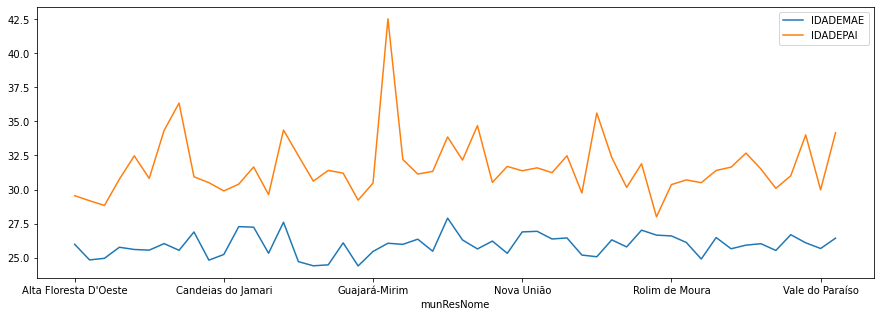

In [43]:
sinasc_b.groupby('munResNome').mean().plot(figsize=[15,5]);

Nos dados do **Item 1** podemos identificar que no geral a idade média dos pais é maior do que a idade média das mães.

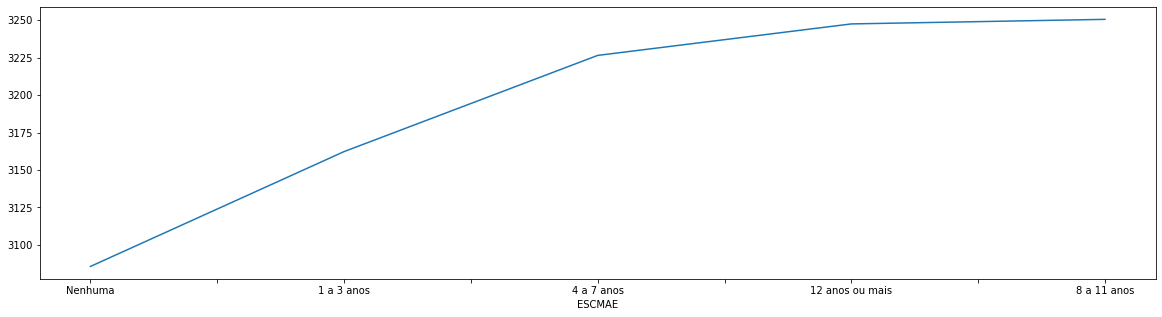

In [52]:
sinasc_c.groupby(['ESCMAE'])['PESO'].mean().sort_values().plot(figsize=[20,5]);

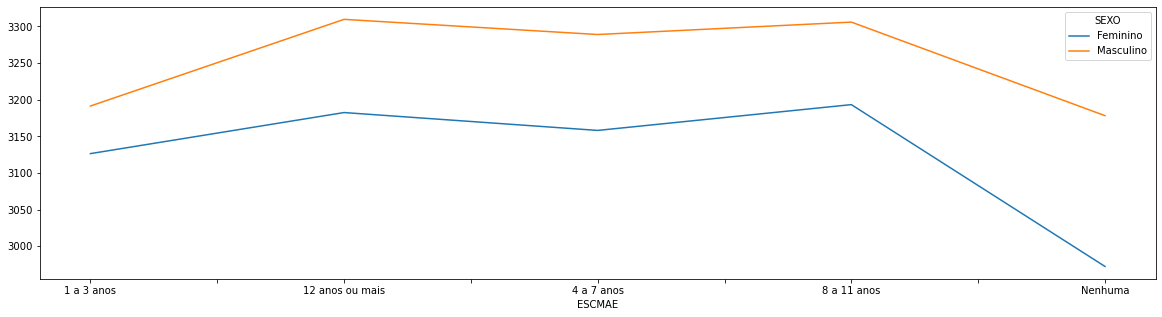

In [55]:
sinasc_c.groupby(['ESCMAE', 'SEXO'])['PESO'].mean().unstack().plot(figsize=[20,5]);

Nos dados do **Item 2**, observando os dados no geral, podemos perceber duas coisas, bebês do sexo masculino tendem a nascer mais pesados do que bebês do sexo feminino e quanto menor o grau de escolaridade da mãe menor é o peso de nascimento do bebê.

Os dados obtidos no **Item 3** e **Item 4** apenas confirmam o insight obtido analisando o **Item 1**: média de idade dos pais é maior do que a média de idade da mães.